1. llamaindex framework
2. Lancedb
3. LLM model(GPT-4V)
4. GEMINI-PRO-VISION

Steps:
1. Download video from YouTube, process and store it.

2. Build Multi-Modal index and vector store for both texts and images.

3. Retrieve relevant images and context, use both to augment the prompt.

4. Using GPT4V for reasoning the correlations between the input query and augmented data and generating final response.

In [1]:
%pip install llama-index-vector-stores-lancedb
%pip install llama-index-multi-modal-llms-openai

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 115.1/115.1 kB 3.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.4/15.4 MB 46.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 75.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.6/21.6 MB 73.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.6/75.6 kB 8.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 141.9/141.9 kB 21.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 320.7/320.7 kB 42.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 77.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.9/77.9 kB 11.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 9.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.7/98.7 kB 15.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.3/49.3 kB 8.1 MB/s eta 0:00:00


In [2]:
#%pip install llama-index-multi-modal-llms-openai
#%pip install llama-index-vector-stores-lancedb
%pip install llama-index-embeddings-clip

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.4/54.4 kB 1.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 14.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 23.5 MB/s eta 0:00:00
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl (410.6 MB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl (121.6 MB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl (56.5 MB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl (124.2 MB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x

In [1]:
%pip install llama_index ftfy regex tqdm
%pip install -U openai-whisper
%pip install git+https://github.com/openai/CLIP.git
%pip install torch torchvision
%pip install matplotlib scikit-image
%pip install lancedb
%pip install moviepy
%pip install pytube
%pip install pydub
%pip install SpeechRecognition
%pip install ffmpeg-python
%pip install soundfile

  Cloning https://github.com/openai/CLIP.git to /tmp/pip-req-build-cjtwn42o
  Running command git clone --filter=blob:none --quiet https://github.com/openai/CLIP.git /tmp/pip-req-build-cjtwn42o
  Resolved https://github.com/openai/CLIP.git to commit a1d071733d7111c9c014f024669f959182114e33
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.6/57.6 kB 2.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 32.8/32.8 MB 43.4 MB/s eta 0:00:00


In [2]:
from moviepy.editor import VideoFileClip
from pathlib import Path
import speech_recognition as sr
from pytube import YouTube
from pprint import pprint

In [3]:
from google.colab import userdata
OPENAI_API_TOKEN=userdata.get('OPENAI_API_KEY')

In [4]:
import os
os.environ["OPENAI_API_KEY"] = OPENAI_API_TOKEN

In [5]:
from PIL import Image
import matplotlib.pyplot as plt

In [7]:
import os
os.getcwd()

'/content'

In [57]:
video_url="https://www.youtube.com/watch?v=NmswQxrXOV0"
output_video_path = "/content/video_data/"
output_folder = "/content/mixed_data/"
output_audio_path = "/content/mixed_data/output_audio.wav"

In [58]:
filepath=output_video_path + "input_vid.mp4"

In [59]:
filepath

'/content/video_data/input_vid.mp4'

In [60]:
#filepath = output_video_path + "input_vid.mp4"
#Path(output_folder).mkdir(parents=True, exist_ok=True)

In [61]:
#Path(filepath).mkdir(parents=True,exist_ok=True)

In [62]:
import matplotlib.pyplot as plt

In [63]:
def plot_images(images_path):
  images_shown = 0
  plt.figure(figsize=(16, 9))
  for img_path in images_path:
        if os.path.isfile(img_path):
            image = Image.open(img_path)

            plt.subplot(2, 3, images_shown + 1)
            plt.imshow(image)
            plt.xticks([])
            plt.yticks([])

            images_shown += 1
            if images_shown >= 5:
                break


In [64]:
from pytube import YouTube
def download_video(url,output_path):
  yt = YouTube(url)
  metadata = {"Author": yt.author, "Title": yt.title, "Views": yt.views}
  yt.streams.get_highest_resolution().download(
        output_path=output_path, filename="input_vid.mp4"
    )
  return metadata

In [65]:
from moviepy.editor import VideoFileClip
def video_to_images(video_path,output_flder):
  clip=VideoFileClip(video_path)
  clip.write_images_sequence(
      os.path.join(output_folder,"frame%04d.png"),fps=0.2
  )

In [66]:
def video_to_audio(video_path,output_audio_path):
  clip=VideoFileClip(video_path)
  audio=clip.audio
  audio.write_audiofile(output_audio_path)


In [67]:
def audio_to_text(audio_path):
  recognizer=sr.Recognizer()
  audio=sr.AudioFile(audio_path)

  with audio as source:
    audio_data=recognizer.record(source)

    try:

      #recognize the speech
      text = recognizer.recognize_whisper(audio_data)

    except sr.UnknownValueError:
      print("Speech recognition could not understand the audio.")
  return text



In [68]:
video_url

'https://www.youtube.com/watch?v=NmswQxrXOV0'

In [69]:
output_video_path

'/content/video_data/'

In [70]:
metadata_vid = download_video(video_url, output_video_path)

In [71]:
metadata_vid

{'Author': 'Firstpost',
 'Title': "Calls for Google CEO Sundar Pichai's Resignation Grow | Firstpost Unpacked",
 'Views': 200257}

In [72]:
filepath

'/content/video_data/input_vid.mp4'

In [73]:
output_folder

'/content/mixed_data/'

In [74]:
!mkdir mixed_data

mkdir: cannot create directory ‘mixed_data’: File exists


In [75]:
filepath

'/content/video_data/input_vid.mp4'

In [76]:
output_folder

'/content/mixed_data/'

In [77]:
video_to_images(filepath,output_folder)

Moviepy - Writing frames /content/mixed_data/frame%04d.png.


Moviepy - Done writing frames /content/mixed_data/frame%04d.png.


In [78]:
filepath

'/content/video_data/input_vid.mp4'

In [79]:
output_audio_path

'/content/mixed_data/output_audio.wav'

In [80]:
video_to_audio(filepath,output_audio_path)

MoviePy - Writing audio in /content/mixed_data/output_audio.wav


MoviePy - Done.


In [81]:
output_audio_path

'/content/mixed_data/output_audio.wav'

In [82]:
text_data=audio_to_text(output_audio_path)

In [83]:
text_data

" What platform do you turn to when you have questions? What do you do when you want answers that are quick and reliable? These days, the answers are all there on the internet. And for most people, Google is the trusted platform. But what happens when you go to platform betrays that trust? A through Google? The Tech Giant series of mishaps have become a recent talking point, and Google CEO Sundar Pichai is facing the heat. When OpenAI launched ChatGPT, it took the tech world by storm. The big giants like Microsoft and Google were caught napping. But now Microsoft has made its move. They have a partnership with OpenAI, and they have hired the mastermind behind it, Sam Oldman. Then it was Google's turn. They launched a chat board called Bard in December, which was renamed Gemini. Seven years into our journey as an AI first company, we are at an exciting inflection point. We have an opportunity to make AI even more helpful for people, for businesses, for communities, for everyone. We have

In [84]:
with open(output_folder + "output_text.txt", "w") as file:
        file.write(text_data)
print("Text data saved to file")
file.close()




Text data saved to file


In [88]:
#audio file is not required
os.remove(output_audio_path)
print("Audio file removed")

Audio file removed


In [85]:
#llama-index
!pip install llama-index-readers-file

In [86]:
from llama_index.core.indices import MultiModalVectorStoreIndex
from llama_index.core import SimpleDirectoryReader
from llama_index.core import StorageContext

In [87]:
from llama_index.vector_stores.lancedb import LanceDBVectorStore

In [89]:
text_store=LanceDBVectorStore(uri="lancedb",table_name="text_collection") #for text
image_store=LanceDBVectorStore(uri="lancedb",table_name="image_collection") #for image

In [90]:
#initializing the variable
storage_context=StorageContext.from_defaults(vector_store=text_store,image_store=image_store)

In [91]:
output_folder

'/content/mixed_data/'

In [92]:
#create documents
documents=SimpleDirectoryReader(output_folder).load_data()

In [93]:
documents

[ImageDocument(id_='32bd97be-b7e6-4a51-9fe5-9aac17482c28', embedding=None, metadata={'file_path': '/content/mixed_data/frame0000.png', 'file_name': 'frame0000.png', 'file_type': 'image/png', 'file_size': 186470, 'creation_date': '2024-05-30', 'last_modified_date': '2024-05-30'}, excluded_embed_metadata_keys=['file_name', 'file_type', 'file_size', 'creation_date', 'last_modified_date', 'last_accessed_date'], excluded_llm_metadata_keys=['file_name', 'file_type', 'file_size', 'creation_date', 'last_modified_date', 'last_accessed_date'], relationships={}, text='', start_char_idx=None, end_char_idx=None, text_template='{metadata_str}\n\n{content}', metadata_template='{key}: {value}', metadata_seperator='\n', image=None, image_path='/content/mixed_data/frame0000.png', image_url=None, image_mimetype=None, text_embedding=None),
 ImageDocument(id_='de0db248-9ada-4ba0-85e1-59d8a09dde8d', embedding=None, metadata={'file_path': '/content/mixed_data/frame0001.png', 'file_name': 'frame0001.png', 'fi

In [94]:
#pass the documents and storage context inside the Multimodalvectorstoreindex
index = MultiModalVectorStoreIndex.from_documents(documents,storage_context=storage_context)

100%|████████████████████████████████████████| 338M/338M [00:03<00:00, 105MiB/s]


In [95]:
#create the retriever
retriever_engine=index.as_retriever(imilarity_top_k=5, image_similarity_top_k=5)

### Building RAG

In [98]:
import json
metadata_str=json.dumps(metadata_vid)
# Pass the  Metadata of the video in the form of json

In [99]:
#Create a prompt template
qa_tmpl_str=(
    "Given the provided information, including relevant images and retrieved context from the video, \
    accurately and precisely answer the query without any additional prior knowledge.\n"

    "---------------------\n"
    "Context: {context_str}\n"
    "Metadata for video: {metadata_str} \n"

    "---------------------\n"
    "Query: {query_str}\n"
    "Answer: "
)

In [123]:
qa_tmpl_str2=(
    "Given the provided information, including relevant images and retrieved context from the video, \
    accurately and precisely answer the query without any additional prior knowledge.\n"

    "---------------------\n"
    "Metadata for video: {metadata_str} \n"

    "---------------------\n"
    "Query: {query_str}\n"
    "Answer: "
)

In [100]:
from llama_index.core.response.notebook_utils import display_source_node
from llama_index.core.schema import ImageNode

In [101]:
query_str="Sundar pichai step down from CEO post?"

In [102]:
retrieval_results=retriever_engine.retrieve(query_str)

In [103]:
retrieval_results

[NodeWithScore(node=TextNode(id_='0bcfa811-bf36-4ae5-aaea-b01011a43e8d', embedding=[0.015959111973643303, -0.009662366472184658, 0.008200252428650856, -0.028856061398983, 0.002031097188591957, 0.02984919585287571, -0.004296684172004461, 0.001912127947434783, -0.016138428822159767, -0.02518698386847973, 0.018552295863628387, 0.02921469323337078, -0.014021121896803379, 0.012669355608522892, 0.004462206270545721, 0.001756088575348258, 0.023255888372659683, 0.0007586440769955516, 0.010883093811571598, -0.015655655413866043, -0.031587179750204086, -0.006751932203769684, 0.0016888451064005494, 0.02935262955725193, -0.016317743808031082, 0.006148465443402529, 0.02957332506775856, -0.006589858327060938, -0.03001471795141697, 0.003938052337616682, 0.007089873775839806, -0.00595880439504981, -0.025421472266316414, 0.0009991687256842852, -0.03015265427529812, 0.004513932392001152, 0.015876350924372673, -0.012759014032781124, 0.0016871209954842925, -0.031863052397966385, 0.018786786124110222, 0.00

In [104]:
retrieved_image=[]
retrieved_text=[]

In [105]:
for res_node in retrieval_results:
  print(res_node)

Node ID: 0bcfa811-bf36-4ae5-aaea-b01011a43e8d
Text: What platform do you turn to when you have questions? What do
you do when you want answers that are quick and reliable? These days,
the answers are all there on the internet. And for most people, Google
is the trusted platform. But what happens when you go to platform
betrays that trust? A through Google? The Tech Giant series of mishaps
have be...
Score:  0.710

Node ID: 0c2fefd5-ca29-4443-973e-831cd462dbea
Text:
Score:  0.000

Node ID: 713397f8-2bb8-4739-84d3-4ae755ffcf9b
Text:
Score:  0.000

Node ID: f6fcd8f9-7225-4d96-abab-0066c00f7ed0
Text:
Score:  0.000

Node ID: 7713b1ab-2c57-49f3-9932-d63faa676d65
Text:
Score:  0.000

Node ID: 82e1253c-aebc-4eea-94da-cc762cfe239a
Text:
Score:  0.000



In [109]:
#getting image and text on top of the video
for res_node in retrieval_results:
  if isinstance(res_node.node,ImageNode):
    retrieved_image.append(res_node.node.metadata["file_path"])
  else:
     display_source_node(res_node, source_length=200)
     retrieved_text.append(res_node.text)




**Node ID:** 0bcfa811-bf36-4ae5-aaea-b01011a43e8d<br>**Similarity:** 0.710077166557312<br>**Text:** What platform do you turn to when you have questions? What do you do when you want answers that are quick and reliable? These days, the answers are all there on the internet. And for most people, G...<br>

In [110]:
retrieved_image

['/content/mixed_data/frame0035.png',
 '/content/mixed_data/frame0036.png',
 '/content/mixed_data/frame0040.png',
 '/content/mixed_data/frame0028.png',
 '/content/mixed_data/frame0039.png',
 '/content/mixed_data/frame0035.png',
 '/content/mixed_data/frame0036.png',
 '/content/mixed_data/frame0040.png',
 '/content/mixed_data/frame0028.png',
 '/content/mixed_data/frame0039.png']

In [112]:
retrieved_text

["What platform do you turn to when you have questions? What do you do when you want answers that are quick and reliable? These days, the answers are all there on the internet. And for most people, Google is the trusted platform. But what happens when you go to platform betrays that trust? A through Google? The Tech Giant series of mishaps have become a recent talking point, and Google CEO Sundar Pichai is facing the heat. When OpenAI launched ChatGPT, it took the tech world by storm. The big giants like Microsoft and Google were caught napping. But now Microsoft has made its move. They have a partnership with OpenAI, and they have hired the mastermind behind it, Sam Oldman. Then it was Google's turn. They launched a chat board called Bard in December, which was renamed Gemini. Seven years into our journey as an AI first company, we are at an exciting inflection point. We have an opportunity to make AI even more helpful for people, for businesses, for communities, for everyone. We have

In [113]:
def retrieve(retriever_engine, query_str):
    retrieval_results = retriever_engine.retrieve(query_str)

    retrieved_image = []
    retrieved_text = []
    for res_node in retrieval_results:
        if isinstance(res_node.node, ImageNode):
            retrieved_image.append(res_node.node.metadata["file_path"])
        else:
            display_source_node(res_node, source_length=200)
            retrieved_text.append(res_node.text)

    return retrieved_image, retrieved_text

In [114]:
img, txt = retrieve(retriever_engine=retriever_engine, query_str=query_str)

**Node ID:** 0bcfa811-bf36-4ae5-aaea-b01011a43e8d<br>**Similarity:** 0.710077166557312<br>**Text:** What platform do you turn to when you have questions? What do you do when you want answers that are quick and reliable? These days, the answers are all there on the internet. And for most people, G...<br>

In [115]:
output_folder

'/content/mixed_data/'

In [116]:
img

['/content/mixed_data/frame0035.png',
 '/content/mixed_data/frame0036.png',
 '/content/mixed_data/frame0040.png',
 '/content/mixed_data/frame0028.png',
 '/content/mixed_data/frame0039.png']

In [118]:
image_documents = SimpleDirectoryReader(input_dir=output_folder, input_files=img).load_data()
image_documents

[ImageDocument(id_='dd4bc3fc-e05d-41d8-9dda-062af762ace2', embedding=None, metadata={'file_path': '/content/mixed_data/frame0035.png', 'file_name': 'frame0035.png', 'file_type': 'image/png', 'file_size': 631001, 'creation_date': '2024-05-30', 'last_modified_date': '2024-05-30'}, excluded_embed_metadata_keys=['file_name', 'file_type', 'file_size', 'creation_date', 'last_modified_date', 'last_accessed_date'], excluded_llm_metadata_keys=['file_name', 'file_type', 'file_size', 'creation_date', 'last_modified_date', 'last_accessed_date'], relationships={}, text='', start_char_idx=None, end_char_idx=None, text_template='{metadata_str}\n\n{content}', metadata_template='{key}: {value}', metadata_seperator='\n', image=None, image_path='/content/mixed_data/frame0035.png', image_url=None, image_mimetype=None, text_embedding=None),
 ImageDocument(id_='39932ac3-3a20-44d7-83d7-fabc25fe26bc', embedding=None, metadata={'file_path': '/content/mixed_data/frame0036.png', 'file_name': 'frame0036.png', 'fi

In [119]:
image_documents2 = SimpleDirectoryReader(input_files=img).load_data()

In [120]:
context_str = "".join(txt)

In [121]:
context_str

"What platform do you turn to when you have questions? What do you do when you want answers that are quick and reliable? These days, the answers are all there on the internet. And for most people, Google is the trusted platform. But what happens when you go to platform betrays that trust? A through Google? The Tech Giant series of mishaps have become a recent talking point, and Google CEO Sundar Pichai is facing the heat. When OpenAI launched ChatGPT, it took the tech world by storm. The big giants like Microsoft and Google were caught napping. But now Microsoft has made its move. They have a partnership with OpenAI, and they have hired the mastermind behind it, Sam Oldman. Then it was Google's turn. They launched a chat board called Bard in December, which was renamed Gemini. Seven years into our journey as an AI first company, we are at an exciting inflection point. We have an opportunity to make AI even more helpful for people, for businesses, for communities, for everyone. We have 

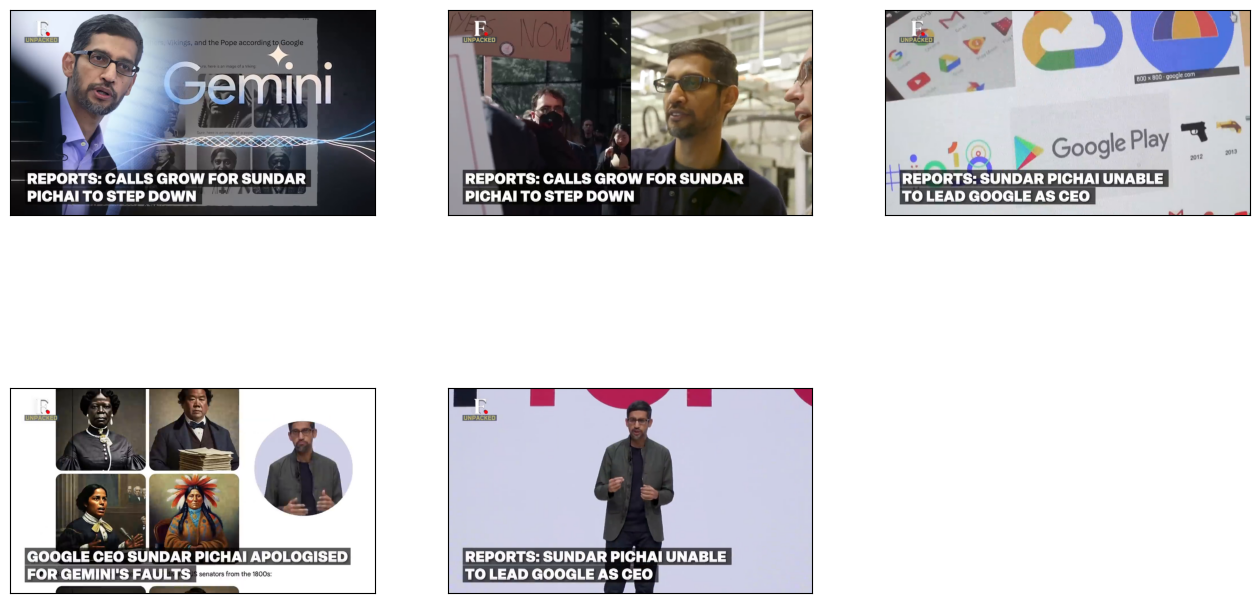

In [122]:
plot_images(img)

In [124]:
qa_tmpl_str2

'Given the provided information, including relevant images and retrieved context from the video,     accurately and precisely answer the query without any additional prior knowledge.\n---------------------\nMetadata for video: {metadata_str} \n---------------------\nQuery: {query_str}\nAnswer: '

In [125]:
from llama_index.multi_modal_llms.openai import OpenAIMultiModal

In [126]:
openai_mm_llm = OpenAIMultiModal(model="gpt-4-vision-preview", api_key=OPENAI_API_TOKEN, max_new_tokens=1500)

In [128]:
result=openai_mm_llm.complete(
    prompt=qa_tmpl_str.format(
        context_str=context_str,
        query_str=query_str,
        metadata_str=metadata_str
    ),
    image_documents=image_documents2,
)

NotFoundError: Error code: 404 - {'error': {'message': 'The model `gpt-4-vision-preview` does not exist or you do not have access to it.', 'type': 'invalid_request_error', 'param': None, 'code': 'model_not_found'}}

In [ ]:
#Without text, just i passed the image and i got the response based on the image
result=openai_mm_llm.complete(
    prompt=qa_tmpl_str2.format(
        #context_str=context_str,
        query_str=query_str,
        metadata_str=metadata_str
    ),
    image_documents=image_documents2,
)

In [129]:
#pprint(result.text)

In [130]:
"""result2=openai_mm_llm.complete(
    prompt="what is google gemini?",
    image_documents=image_documents2
)
print(result2.text)
"""

'result2=openai_mm_llm.complete(\n    prompt="what is O\'Reilly?",\n    image_documents=image_documents2\n)\nprint(result2.text)\n'

In [131]:
"""result3=openai_mm_llm.complete(
    prompt="just tell me what you are seeing over the pacific ocean?",
    image_documents=image_documents2
)
pprint(result3.text)
"""

#real time system -satellite-just tell me what you are seeing over the pecific ocean?

'result3=openai_mm_llm.complete(\n    prompt="just tell me what you are seeing over the pacific ocean?",\n    image_documents=image_documents2\n)\npprint(result3.text)\n'